**Connecting with Database**

The department of Healthcare wants to access all the clean data to be accessed over the internet through its official website. They have sent a requirement to upload all the data that has been cleaned to a database.
You have been given the responsibility to address their requirement.


**Problem Statement 18: (Database connection and data upload)**

All the files in the clean folder are required to be uploaded to a relational database. The table names should be the same as the file names without the extension.
The primary key and foreign key constraints should be included in the tables wherever required.


**Let's first install required packages**

In [1]:

pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


**Let's import the package pyodbc**

In [2]:
import pyodbc

**Let's set up connection string**

In [3]:
conn = pyodbc.connect('Driver={SQL Server};'
                     'Server=DESKTOP-TOEPTEF\SQL_SERVER;'
                     'Trusted_Connection=yes;')

In [4]:
# Let's Create a cursor object to execute SQL queries

mycursor = conn.cursor()

**Let's first change the default autocommit transaction from False to True**

In [5]:
conn.autocommit = True

In [ ]:
# Let's first drop the database 'Healthcare' if exists
mycursor.execute("DROP DATABASE Healthcare")

In [ ]:
mycursor.commit()

In [6]:
# Now, let's create a new database
mycursor.execute("CREATE DATABASE Healthcare")

In [7]:
# Let's use the Healthcare database

mycursor.execute('USE Healthcare')

In [8]:
# Let's import necessary libraries

import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Let's read the census dataset

census_df = pd.read_csv('C:/Users/Futurense/Desktop/Clean_Data/census.csv')

# Let's see the dataframe

census_df.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Ladakh,Leh,133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0
3,Ladakh,Kargil,140802.0,77785.0,63017.0,112602.0,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


In [10]:
# Let's read the all_hospitals dataset

all_hospitals_df = pd.read_csv('C:/Users/Futurense/Desktop/Clean_Data/all_hospitals.csv')

# Let's see the dataframe

all_hospitals_df.head()

,State/UT,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds
0,Andaman and Nicobar Islands,27,4,0,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,0,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [11]:
# Let's read the government_hospital dataset

government_hospital_df = pd.read_csv('C:/Users/Futurense/Desktop/Clean_Data/government_hospital.csv')

# Let's see the dataframe

government_hospital_df.head()

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
0,Andhra Pradesh,193,6480,65,16658,2017-01-01
1,Arunachal Pradesh,208,2136,10,268,2017-12-31
2,Assam,1176,10944,50,6198,2017-12-31
3,Bihar,930,6083,103,5936,2016-12-31
4,Chhattisgarh,169,5070,45,4342,2016-01-01


In [12]:
# Let's read the housing dataset

housing_df = pd.read_csv('C:/Users/Futurense/Desktop/Clean_Data/housing.csv')

# Let's see the dataframe

housing_df.head()

,State/UT,District,Households_Rural,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise,Households_Urban,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
0,Jammu and Kashmir,Kupwara,158438.0,92052.0,13150.0,77476.0,23226.0,11497.0,1115.0,16305.0
1,Jammu and Kashmir,Badgam,160649.0,74380.0,6265.0,133821.0,27190.0,9190.0,707.0,24580.0
2,Ladakh,Leh,36920.0,19014.0,775.0,32527.0,17474.0,9541.0,192.0,16740.0
3,Ladakh,Kargil,40370.0,29591.0,1413.0,39078.0,7774.0,5349.0,93.0,7580.0
4,Jammu and Kashmir,Punch,132139.0,78623.0,3171.0,18103.0,15269.0,4168.0,122.0,11498.0


In [13]:
# let's create a function which will take dataframe name as an argument and return us the table in the database of sql-server

def create_table_from_df(df,table_name):

    '''
    This function will take dataframe as input and return a table in the database in sql-server
    '''
    columns = []
    for column in df.columns:
        dtype = df[column].dtype
        column = column.replace(' ', '_')
        column = column.replace('-', '_')
        column = column.replace('/', '_')
        data_type = 'VARCHAR(255)' #Setting default value
        

        if dtype == 'int64':
            data_type = 'INT'
        elif dtype == 'float64':
            data_type = 'FLOAT'
        elif dtype == 'object':
            data_type ='VARCHAR(255)'
        columns.append(f'{column} {data_type}')

    #Create the table
    create_table = f"CREATE TABLE {table_name} ({', '.join(columns)})"
    mycursor.execute(create_table)
    mycursor.commit()
    
    print(f"Table {table_name} created successfully.")


In [14]:
# Let's create census table

create_table_from_df(census_df,'census')

Table census created successfully.


In [15]:
# Let's create all_hospitals table

create_table_from_df(all_hospitals_df,'all_hospitals')

Table all_hospitals created successfully.


In [16]:
# Let's create government_hospital table

create_table_from_df(government_hospital_df,'government_hospital')

Table government_hospital created successfully.


In [17]:
# Let's create housing table

create_table_from_df(housing_df,'housing')

Table housing created successfully.


In [18]:
# Let's check the tables present in our dataset

mycursor.execute("SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE = 'BASE TABLE'")

    # Fetch all the table names
tables = mycursor.fetchall()

    # Print the table names
for table in tables:
    print(table[0])

census
all_hospitals
government_hospital
housing


In [19]:
# Let's write a function to view all the tables all the column details

def table_description(table_name):
    '''
    This fucntion will give us all the column details
    '''
    # Execute sp_columns to retrieve column information
    mycursor.execute(f"EXEC sp_columns {table_name}")

    # Fetch all rows from the result set
    columns = mycursor.fetchall()

    # Iterate over the columns and print the data type
    for column in columns:
        column_name = column[3] 
        data_type = column[5]
        print(f"Column: {column_name}, Data Type: {data_type}")

In [20]:
for i in ['census','government_hospital','housing','all_hospitals']:
    print(f"{i} :- ")
    print(table_description(i))
    print('----'*20)

census :- 
Column: State_UT, Data Type: varchar
Column: District, Data Type: varchar
Column: Population, Data Type: float
Column: Male, Data Type: float
Column: Female, Data Type: float
Column: Literate, Data Type: float
Column: Literate_Male, Data Type: float
Column: Literate_Female, Data Type: float
Column: Households_Rural, Data Type: float
Column: Households_Urban, Data Type: float
Column: Households, Data Type: float
Column: Young_and_Adult, Data Type: float
Column: Middle_Aged, Data Type: float
Column: Senior_Citizen, Data Type: float
Column: Age_Not_Stated, Data Type: float
None
--------------------------------------------------------------------------------
government_hospital :- 
Column: State_UT, Data Type: varchar
Column: Rural_Government_Hospitals, Data Type: int
Column: Rural_Government_Beds, Data Type: int
Column: Urban_Government_Hospitals, Data Type: int
Column: Urban_Government_Beds, Data Type: int
Column: Last_Updated, Data Type: varchar
None
-------------------------

In [21]:
mycursor.commit()

In [22]:
# Let's import data from csv to sql database table 


def insert_data(table_name, csv_file_name):
    
    csv_file = f"C:/Users/Futurense/Desktop/Clean_Data/{csv_file_name}"

    # Define the BULK INSERT statement
    
    bulk_insert_query = f"BULK INSERT {table_name} FROM '{csv_file}' WITH (FORMAT='CSV', FIRSTROW=2, FIELDTERMINATOR=',', ROWTERMINATOR='\n')"

    # Execute the BULK INSERT statement
    
    mycursor.execute(bulk_insert_query)
    
    print("Data Insertion Is Successful")

In [23]:
# Let's insert data into the census table

insert_data('census', 'census.csv')

Data Insertion Is Successful


In [24]:
# Let's insert data into the all_hospitals table

insert_data('all_hospitals', 'all_hospitals.csv')

Data Insertion Is Successful


In [25]:
# Let's insert data into the government_hospital table

insert_data('government_hospital', 'government_hospital.csv')

Data Insertion Is Successful


In [26]:
# Let's insert data into the housing table

insert_data('housing', 'housing.csv')

Data Insertion Is Successful


**Yes! I have successully created four tables and inserted data into those tables as well.**

**Problem Statement 19: (Verify upload)**

Verification is a necessary process to be followed after uploading the data.
Join all the tables using the respective primary key- foreign key pair and show the top 3 rows. 
Verify whether the result is as expected or not. If not, then identify and fix the issue.


In [27]:
# Let's first join all the 4 tables

mycursor.execute(
"""select Top 3 * 
from census c
join
housing h
on c.State_UT = h.State_UT
and c.District = h.District
left join
all_hospitals a
on c.State_UT = a.State_UT
left join
government_hospital g
on c.State_UT = g.State_UT
""")



# Let's fetch top 3 record from the joined table

for x in mycursor:
    print(x)

('Jammu and Kashmir', 'Kupwara', 870354.0, 474190.0, 396164.0, 439654.0, 282823.0, 156831.0, 158438.0, 23226.0, 181664.0, 600759.0, 178435.0, 89679.0, 1481.0, 'Jammu and Kashmir', 'Kupwara', 158438.0, 92052.0, 13150.0, 77476.0, 23226.0, 11497.0, 1115.0, 16305.0, 'Jammu and Kashmir', 702, 87, 0, 29, 818, 11342, 'Jammu and Kashmir', 56, 7234, 76, 4417, '2016-12-30\r')
('Jammu and Kashmir', 'Badgam', 753745.0, 398041.0, 355704.0, 335649.0, 207741.0, 127908.0, 160649.0, 27190.0, 187839.0, 503223.0, 160933.0, 88978.0, 611.0, 'Jammu and Kashmir', 'Badgam', 160649.0, 74380.0, 6265.0, 133821.0, 27190.0, 9190.0, 707.0, 24580.0, 'Jammu and Kashmir', 702, 87, 0, 29, 818, 11342, 'Jammu and Kashmir', 56, 7234, 76, 4417, '2016-12-30\r')
('Ladakh', 'Leh', 133487.0, 78971.0, 54516.0, 93770.0, 62834.0, 30936.0, 36920.0, 17474.0, 54394.0, 70703.0, 41515.0, 21019.0, 250.0, 'Ladakh', 'Leh', 36920.0, 19014.0, 775.0, 32527.0, 17474.0, 9541.0, 192.0, 16740.0, None, None, None, None, None, None, None, None, N

**Problem Statement 20: (Run Query on the database and use in python)**

Write a query that finds the number of households without a toilet on the premise for each district of the state that has the least hospital bed-to-population ratio. 
Display the information using python.


In [28]:
# Let's first get the state name where hospitalbed to population ratio is minimum.

mycursor.execute(
"""
select top 1 *, round((HospitalBeds/Population)*100,4) as Hospitalbed_to_population
from
(
select c.State_UT,a.HospitalBeds, sum(Population) as population
from 
dbo.all_hospitals a
join
dbo.census c
on a.State_UT = c.State_UT
group by c.State_UT, HospitalBeds
) as m
order by Hospitalbed_to_population asc
"""
)

for row in mycursor:
    print(row)

('Bihar', 17796, 104099452.0, 0.0171)


**As we can see from above that Bihar is having the lowest hospitalbed to population ratio.**

In [29]:
# Now let's get the number of households without a toilet on the premise for each district of 'Bihar'

mycursor.execute(
"""
select State_UT, District, 
(Households_Rural + Households_Urban) - (Households_Rural_Toilet_Premise + Households_Urban_Toilet_Premise) as no_toilet_on_premise
from housing
where State_UT = 'Bihar'
order by no_toilet_on_premise desc

""")

for row in mycursor:
    print(row)

('Bihar', 'Purba Champaran', 1011930.0)
('Bihar', 'Madhubani', 884675.0)
('Bihar', 'Samastipur', 853732.0)
('Bihar', 'Muzaffarpur', 807620.0)
('Bihar', 'Pashchim Champaran', 787512.0)
('Bihar', 'Darbhanga', 749103.0)
('Bihar', 'Purnia', 686613.0)
('Bihar', 'Sitamarhi', 675950.0)
('Bihar', 'Araria', 635109.0)
('Bihar', 'Saran', 607771.0)
('Bihar', 'Gaya', 606106.0)
('Bihar', 'Katihar', 605366.0)
('Bihar', 'Patna', 550919.0)
('Bihar', 'Vaishali', 544056.0)
('Bihar', 'Supaul', 535007.0)
('Bihar', 'Siwan', 516717.0)
('Bihar', 'Begusarai', 501713.0)
('Bihar', 'Madhepura', 443017.0)
('Bihar', 'Gopalganj', 441304.0)
('Bihar', 'Rohtas', 434504.0)
('Bihar', 'Bhagalpur', 428342.0)
('Bihar', 'Nalanda', 423983.0)
('Bihar', 'Kishanganj', 397737.0)
('Bihar', 'Saharsa', 390897.0)
('Bihar', 'Banka', 388570.0)
('Bihar', 'Aurangabad', 370307.0)
('Bihar', 'Bhojpur', 369768.0)
('Bihar', 'Nawada', 327803.0)
('Bihar', 'Jamui', 302891.0)
('Bihar', 'Khagaria', 299683.0)
('Bihar', 'Kaimur (Bhabua)', 282556.0)


**Problem Statement 21/22/23/24 is done in the SQL SERVER.**

**Let's do the visualization of Problem Statement : - 24**


**Problem Statement - 24:**

An Agency wants to find out if there is a relationship between dilapidated homes and the lack of households for the people. 
Using a stored procedure, create a report that shows the name of each district, its population, the number of liveable houses per 1000 people, and the number of dilapidated households per 1000 people. 
Visualize the relation between these values using an appropriate plot.


In [30]:

procedure_name = 'EXEC relationship_livable_dilapidated'
data = mycursor.execute(procedure_name)

# Let's fetch the records
sp_record = data.fetchall()

In [31]:
# Let's get the data into a dataframe

relationship_livable_dilapidated_df = pd.DataFrame.from_records(data = sp_record, columns = ['State_UT','District','District_population','Livable_Households_Per_1000','Dilapidated_Households_Per_1000'])

relationship_livable_dilapidated_df.head()

,State_UT,District,District_population,Livable_Households_Per_1000,Dilapidated_Households_Per_1000
0,Jammu and Kashmir,Kupwara,870354,119.0,16.0
1,Jammu and Kashmir,Badgam,753745,111.0,9.0
2,Ladakh,Leh,133487,214.0,7.0
3,Ladakh,Kargil,140802,248.0,11.0
4,Jammu and Kashmir,Punch,476835,174.0,7.0


In [32]:
# Let's first get the top 10 districts with maximum number of Livable Households per 1000 people

top_10_Livable_Households = relationship_livable_dilapidated_df.sort_values('Livable_Households_Per_1000', ascending=False).head(10)
top_10_Livable_Households

,State_UT,District,District_population,Livable_Households_Per_1000,Dilapidated_Households_Per_1000
402,Chhattisgarh,Bilaspur,381956,1028.0,90.0
550,Karnataka,Bijapur,255230,790.0,121.0
170,Uttar Pradesh,Pratapgarh,867848,381.0,53.0
165,Uttar Pradesh,Hamirpur,454768,329.0,10.0
3,Ladakh,Kargil,140802,248.0,11.0
390,Orissa,Nuapada,610382,246.0,17.0
369,Orissa,Debagarh,312520,234.0,40.0
387,Orissa,Baudh,441162,232.0,15.0
388,Orissa,Subarnapur,610183,231.0,22.0
386,Orissa,Kandhamal,733110,221.0,22.0


In [33]:
# Let's combine statename and district name together.

top_10_Livable_Households['Location'] = top_10_Livable_Households['State_UT'] + ' - ' + top_10_Livable_Households['District']

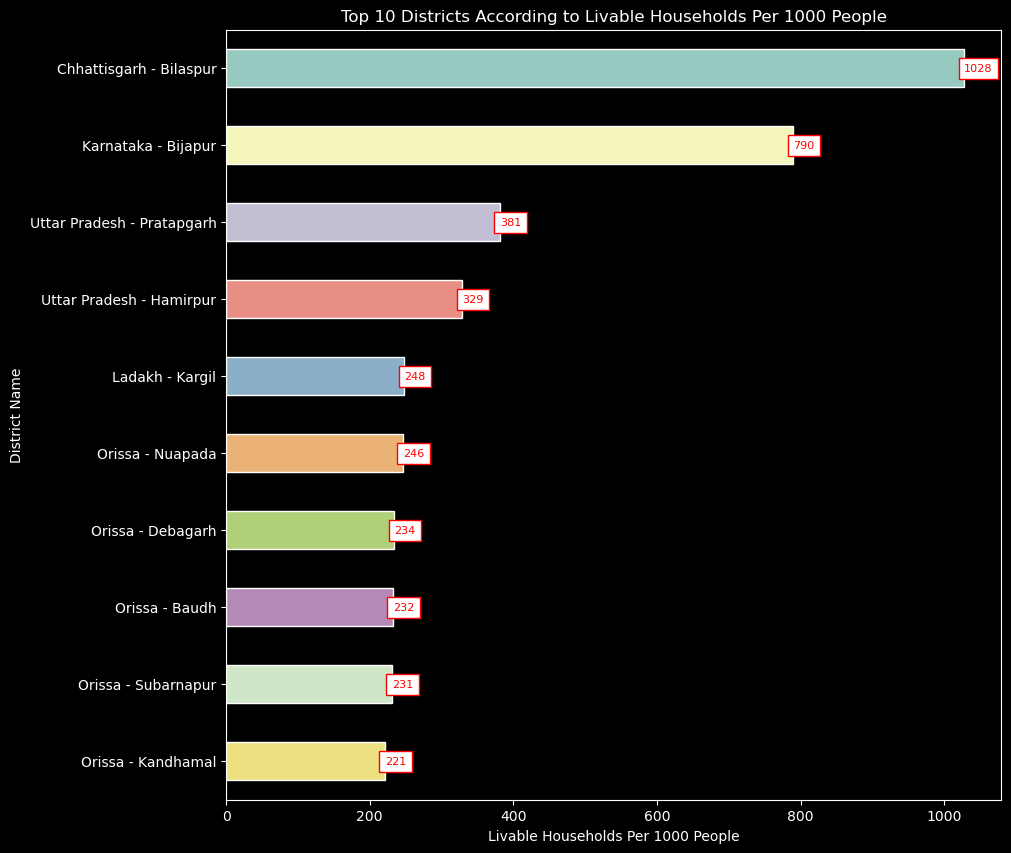

In [34]:
# Let's visualize the top 10 district according to the Livable Households per 1000 people

plt.style.use('dark_background')
plt.figure(figsize = (10,10))
ax = sns.barplot(data = top_10_Livable_Households, y = 'Location',x = 'Livable_Households_Per_1000', width = 0.5, dodge=False, orient = 'h', edgecolor = 'white')

ax.set_title('Top 10 Districts According to Livable Households Per 1000 People')
ax.set_xlabel('Livable Households Per 1000 People')
ax.set_ylabel('District Name')
plt.grid(False)

# adding labels and annotations 
for i in ax.containers:
    ax.bar_label(i, fontsize = 8,color = 'red', bbox=dict(facecolor='w', edgecolor='r'))
plt.show();

In [35]:
# Let's first get the bottom 10 districts with maximum number of Livable Households per 1000 people

bot_10_Livable_Households = relationship_livable_dilapidated_df.sort_values('Livable_Households_Per_1000').head(10)
bot_10_Livable_Households['Location'] = bot_10_Livable_Households['State_UT'] + ' - ' + bot_10_Livable_Households['District']
bot_10_Livable_Households

,State_UT,District,District_population,Livable_Households_Per_1000,Dilapidated_Households_Per_1000,Location
490,Daman and Diu,Diu,52074,42.0,1.0,Daman and Diu - Diu
398,Chhattisgarh,Jashpur,851669,43.0,2.0,Chhattisgarh - Jashpur
638,Pondicherry,Yanam,55626,43.0,2.0,Pondicherry - Yanam
639,Pondicherry,Mahe,41816,46.0,3.0,Pondicherry - Mahe
637,Tamil Nadu,Chennai,4646732,49.0,3.0,Tamil Nadu - Chennai
269,Manipur,Senapati,479148,50.0,2.0,Manipur - Senapati
9,Jammu and Kashmir,Srinagar,1236829,50.0,5.0,Jammu and Kashmir - Srinagar
280,Mizoram,Aizawl,400309,51.0,2.0,Mizoram - Aizawl
636,Telangana,Hyderabad,3943323,52.0,2.0,Telangana - Hyderabad
397,Chhattisgarh,Surguja,2359886,53.0,2.0,Chhattisgarh - Surguja


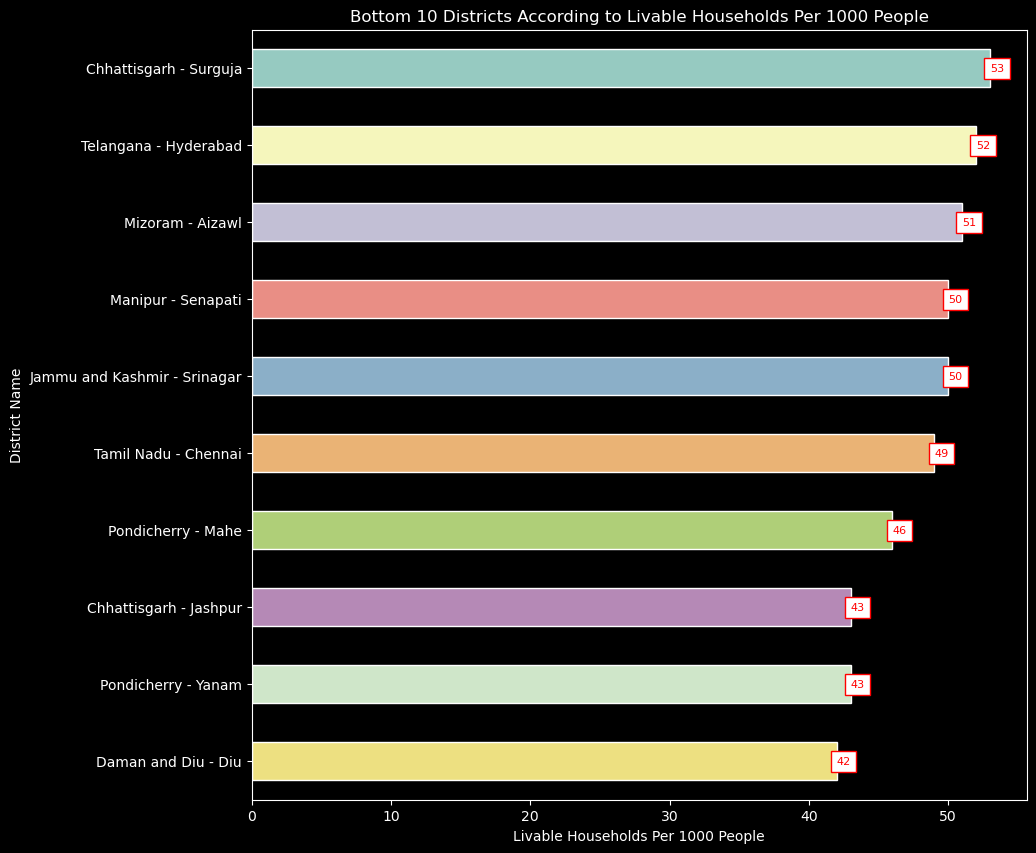

In [36]:
# Let's visualize the bottom 10 district according to the Livable Households per 1000 people

plt.style.use('dark_background')
plt.figure(figsize = (10,10))
ax = sns.barplot(data = bot_10_Livable_Households.sort_values('Livable_Households_Per_1000', ascending = False)
                 , y = 'Location',x = 'Livable_Households_Per_1000', width = 0.5, dodge=False, orient = 'h', edgecolor = 'white')

ax.set_title('Bottom 10 Districts According to Livable Households Per 1000 People')
ax.set_xlabel('Livable Households Per 1000 People')
ax.set_ylabel('District Name')
plt.grid(False)

# adding labels and annotations 
for i in ax.containers:
    ax.bar_label(i, fontsize = 8,color = 'red', bbox=dict(facecolor='w', edgecolor='r'))
plt.show();

In [37]:
# Let's first get the top 10 districts with maximum number of dilapidated Households per 1000 people

top_10_dilapidated_Households = relationship_livable_dilapidated_df.sort_values('Dilapidated_Households_Per_1000', ascending=False).head(10)
top_10_dilapidated_Households['Location'] = top_10_dilapidated_Households['State_UT'] + ' - ' + top_10_dilapidated_Households['District']
top_10_dilapidated_Households

,State_UT,District,District_population,Livable_Households_Per_1000,Dilapidated_Households_Per_1000,Location
550,Karnataka,Bijapur,255230,790.0,121.0,Karnataka - Bijapur
402,Chhattisgarh,Bilaspur,381956,1028.0,90.0,Chhattisgarh - Bilaspur
322,Assam,Darrang,928500,174.0,53.0,Assam - Darrang
170,Uttar Pradesh,Pratapgarh,867848,381.0,53.0,Uttar Pradesh - Pratapgarh
300,Assam,Barpeta,1693622,177.0,52.0,Assam - Barpeta
341,West Bengal,Purba Medinipur,5095875,126.0,46.0,West Bengal - Purba Medinipur
298,Assam,Dhubri,1949258,164.0,45.0,Assam - Dhubri
315,Assam,Hailakandi,659296,151.0,42.0,Assam - Hailakandi
325,West Bengal,Jalpaiguri,3872846,150.0,42.0,West Bengal - Jalpaiguri
330,West Bengal,Murshidabad,7103807,142.0,42.0,West Bengal - Murshidabad


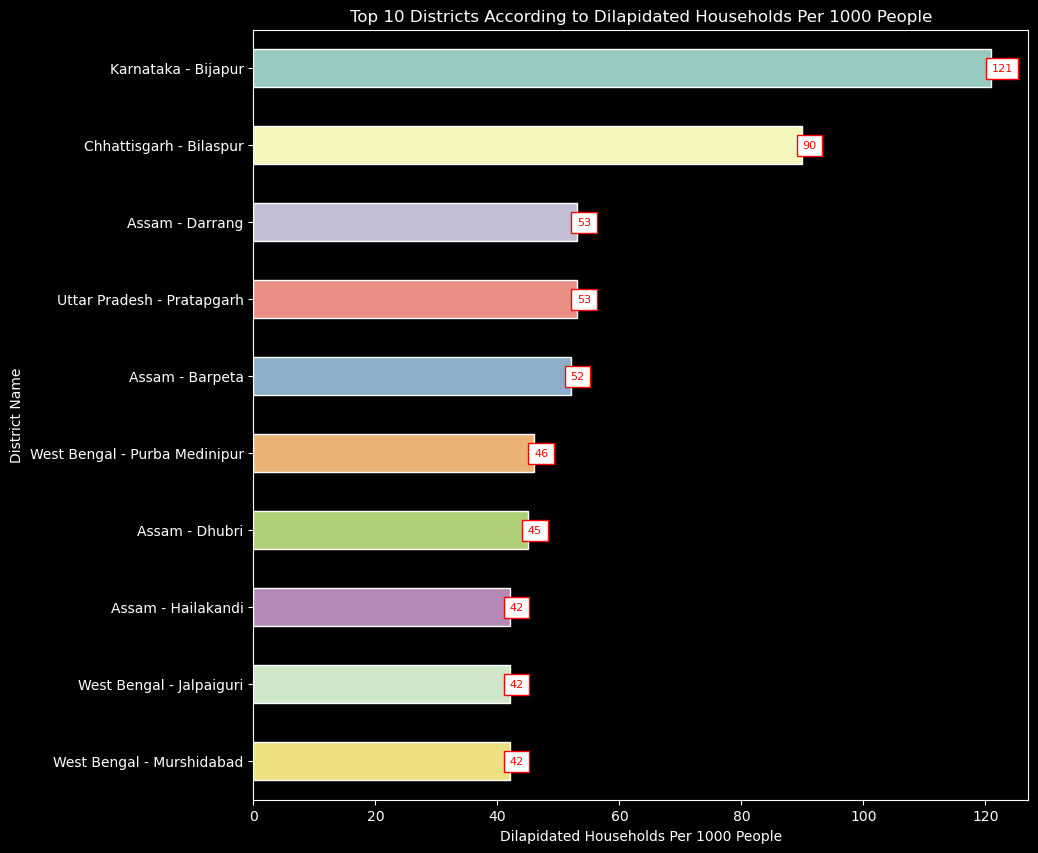

In [38]:
# Let's visualize the top 10 district according to the dilapidated Households per 1000 people

plt.style.use('dark_background')
plt.figure(figsize = (10,10))
ax = sns.barplot(data = top_10_dilapidated_Households
                 , y = 'Location',x = 'Dilapidated_Households_Per_1000', width = 0.5, dodge=False, orient = 'h', edgecolor = 'white')

ax.set_title('Top 10 Districts According to Dilapidated Households Per 1000 People')
ax.set_xlabel('Dilapidated Households Per 1000 People')
ax.set_ylabel('District Name')
plt.grid(False)

# adding labels and annotations 
for i in ax.containers:
    ax.bar_label(i, fontsize = 8,color = 'red', bbox=dict(facecolor='w', edgecolor='r'))
plt.show();

In [39]:
# Let's first get the top 10 districts with maximum number of dilapidated Households per 1000 people

bot_10_dilapidated_Households = relationship_livable_dilapidated_df.sort_values('Dilapidated_Households_Per_1000').head(10)
bot_10_dilapidated_Households['Location'] = bot_10_dilapidated_Households['State_UT'] + ' - ' + bot_10_dilapidated_Households['District']
bot_10_dilapidated_Households

,State_UT,District,District_population,Livable_Households_Per_1000,Dilapidated_Households_Per_1000,Location
492,Dadra and Nagar Haveli,Dadra AND Nagar Haveli,343709,100.0,1.0,Dadra and Nagar Haveli - Dadra AND Nagar Haveli
490,Daman and Diu,Diu,52074,42.0,1.0,Daman and Diu - Diu
398,Chhattisgarh,Jashpur,851669,43.0,2.0,Chhattisgarh - Jashpur
266,Nagaland,Kiphire,74004,140.0,2.0,Nagaland - Kiphire
261,Nagaland,Wokha,166343,130.0,2.0,Nagaland - Wokha
259,Nagaland,Mokokchung,194622,96.0,2.0,Nagaland - Mokokchung
488,Gujarat,Surat,6081322,69.0,2.0,Gujarat - Surat
249,Arunachal Pradesh,Upper Siang,35320,100.0,2.0,Arunachal Pradesh - Upper Siang
636,Telangana,Hyderabad,3943323,52.0,2.0,Telangana - Hyderabad
280,Mizoram,Aizawl,400309,51.0,2.0,Mizoram - Aizawl


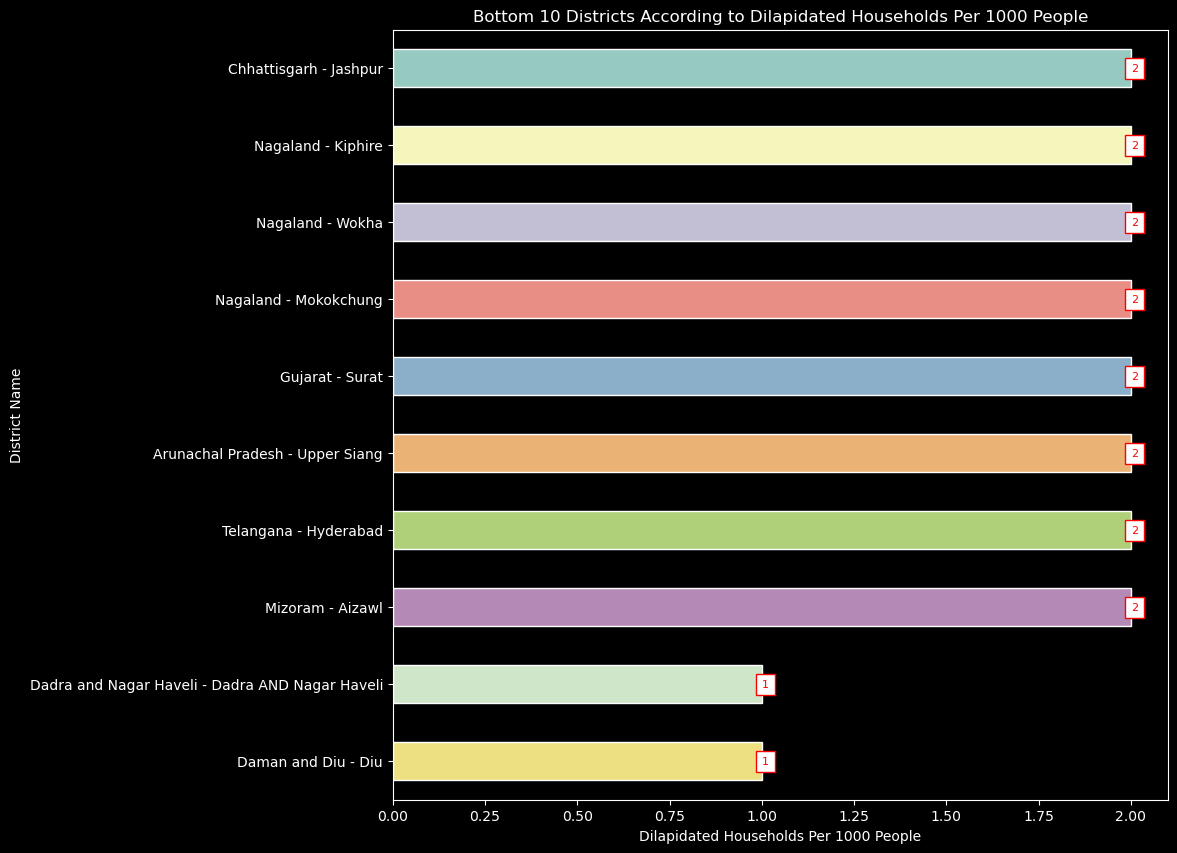

In [41]:
# Let's visualize the bot 10 district according to the dilapidated Households per 1000 people

plt.style.use('dark_background')
plt.figure(figsize = (10,10))
ax = sns.barplot(data = bot_10_dilapidated_Households.sort_values('Dilapidated_Households_Per_1000', ascending = False)
                 , y = 'Location',x = 'Dilapidated_Households_Per_1000', width = 0.5, dodge=False, orient = 'h', edgecolor = 'white')

ax.set_title('Bottom 10 Districts According to Dilapidated Households Per 1000 People')
ax.set_xlabel('Dilapidated Households Per 1000 People')
ax.set_ylabel('District Name')
plt.grid(False)

# adding labels and annotations 
for i in ax.containers:
    ax.bar_label(i, fontsize = 8,color = 'red', bbox=dict(facecolor='w', edgecolor='r'))
plt.show();

In [42]:
mycursor.close()
conn.close()